In [3]:
# imports
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import warnings
import statistics as st             # for statistical analysis
warnings.filterwarnings("ignore")

In [4]:
# setting up several paths 
sys.path.append(".")
sys.path.append("..")
sys.path.insert(1, '../scripts')
from dataCleaner import *
from dataVisualizer import *

In [5]:
# read data
df = pd.read_csv('../data/Week1_challenge_data_source_filled.csv.bz2')
df

Bearer Id                Start  Start ms                  End  \
0       1.311450e+19  2019-04-04 12:01:00     770.0  2019-04-25 14:35:00   
1       1.311450e+19  2019-04-09 13:04:00     235.0  2019-04-25 08:15:00   
2       1.311450e+19  2019-04-09 17:42:00       1.0  2019-04-25 11:58:00   
3       1.311450e+19  2019-04-10 00:31:00     486.0  2019-04-25 07:36:00   
4       1.311450e+19  2019-04-12 20:10:00     565.0  2019-04-25 10:40:00   
...              ...                  ...       ...                  ...   
149995  1.304240e+19  2019-04-29 07:28:00     615.0  2019-04-30 00:01:00   
149996  7.277830e+18  2019-04-29 07:28:00     451.0  2019-04-30 06:02:00   
149997  7.349880e+18  2019-04-29 07:28:00     483.0  2019-04-30 10:41:00   
149998  1.311450e+19  2019-04-29 07:28:00     283.0  2019-04-30 10:46:00   
149999  1.311450e+19  2019-04-29 07:28:00     696.0  2019-04-30 10:40:00   

        End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0        662.0  1823652.0  2.082010e+14   3.366496e+10  3.552120e+13   
1        606.0  1365104.0  2.082020e+14   3.368185e+10  3.579400e+13   
2        652.0  1361762.0  2.082000e+14   3.376063e+10  3.528150e+13   
3        171.0  1321509.0  2.082010e+14   3.375034e+10  3.535660e+13   
4        954.0  1089009.0  2.082010e+14   3.369980e+10  3.540700e+13   
...        ...        ...           ...            ...           ...   
149995   407.0    59587.0  2.082010e+14   3.366865e+10  3.533250e+13   
149996   214.0    81230.0  2.082020e+14   3.365069e+10  3.548310e+13   
149997   187.0    97970.0  2.082020e+14   3.366345e+10  3.566050e+13   
149998   810.0    98249.0  2.082020e+14   3.362189e+10  3.572120e+13   
149999   327.0    97910.0  2.082020e+14   3.361962e+10  8.618620e+13   

       Last Location Name  ...  Other UL (Bytes)  Total UL (Bytes)  \
0             9.16457E+15  ...         8814393.0        36749741.0   
1                 L77566A  ...        15055145.0        53800391.0   
2                 D42335A  ...         4215763.0        27883638.0   
3                 T21824A  ...        12797283.0        43324218.0   
4                 D88865A  ...        13910322.0        38542814.0   
...                   ...  ...               ...               ...   
149995            T85721A  ...        14890486.0        53745392.0   
149996            D20434A  ...        13487416.0        57628851.0   
149997            D10223C  ...         2457758.0        39135081.0   
149998            T51102A  ...        11314729.0        34912224.0   
149999            L88342B  ...         1406930.0        29626096.0   

        Total DL (Bytes)  total_google  total_email  total_gaming  \
0            308879636.0     2905912.0    3701304.0   292426453.0   
1            653384965.0     4414096.0     937385.0   609920783.0   
2            279807335.0    10229119.0    3363124.0   229980251.0   
3            846028530.0    11811761.0    2070983.0   810387875.0   
4            569138589.0     7748843.0    2110349.0   531237049.0   
...                  ...           ...          ...           ...   
149995       819016468.0     1265634.0    4280107.0   797160102.0   
149996       574175259.0    12784914.0     690876.0   535806880.0   
149997       666648844.0     4415361.0    2121718.0   631628095.0   
149998       592786405.0     6585469.0    2058277.0   566933800.0   
149999       371895920.0     7757267.0    2850914.0   355066446.0   

        total_youtube  total_netflix  total_social  total_other  
0          18355943.0     17855187.0     1570185.0  180558843.0  
1          39359124.0     35565545.0     1933278.0  541959383.0  
2          34425237.0     23751202.0     1726277.0  414908351.0  
3          36534765.0     15092588.0      657493.0  761837216.0  
4          34222253.0     17539799.0      912788.0  564619822.0  
...               ...            ...           ...          ...  
149995     24553645.0     29618711.0      993175.0  336273648.0  
149996     27955095.0     37561864.

In [6]:
# create a df cleaner instance
cleaner = dataCleaner()
visualizer = dataVisualizer()

Data cleaner in action.
Data visualizer in action.


# EDA

## User overview analysis part two

### Basic Metrics

In [7]:
# selected relevant features
relevant_features = ['Dur. (ms)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)', 'total_google', 'total_email', 'total_gaming', 'total_youtube', 'total_netflix', 'total_social', 'total_other']

* Analyze the basic metrics (mean, median, etc) in the Dataset

In [8]:
# basic metrics
print("Mean\n", df[relevant_features].mean(), '\n')
print("Median\n", df[relevant_features].median(), '\n')

mode_series = pd.Series(df[relevant_features].mode().values[0], index=relevant_features)
print("Mode\n", mode_series, '\n')

print("Highest\n", df[relevant_features].max(), '\n')
print("lowest\n", df[relevant_features].min(), '\n')

Mean
 Dur. (ms)                    1.046086e+05
Activity Duration DL (ms)    1.829177e+06
Activity Duration UL (ms)    1.408880e+06
Social Media DL (Bytes)      1.795322e+06
Social Media UL (Bytes)      3.292843e+04
Google DL (Bytes)            5.750753e+06
Google UL (Bytes)            2.056542e+06
Email DL (Bytes)             1.791729e+06
Email UL (Bytes)             4.673734e+05
Youtube DL (Bytes)           1.163407e+07
Youtube UL (Bytes)           1.100941e+07
Netflix DL (Bytes)           1.162685e+07
Netflix UL (Bytes)           1.100175e+07
Gaming DL (Bytes)            4.220447e+08
Gaming UL (Bytes)            8.288398e+06
Other DL (Bytes)             4.211005e+08
Other UL (Bytes)             8.264799e+06
Total UL (Bytes)             4.112121e+07
Total DL (Bytes)             4.546434e+08
total_google                 7.807295e+06
total_email                  2.259102e+06
total_gaming                 4.303331e+08
total_youtube                2.264348e+07
total_netflix               

### Non-Graphical Univariate Analysis

Computing dispersion parameters for each quantitative variable

In [9]:
for cols in relevant_features:
    print(cols)
    # mean - the average
    print("Mean", st.mean(df[cols]))
    
    # mode - most common value
    print("Mode", st.mode(df[cols]))
    
    # median - the center value
    print("Median", st.median(df[cols]))
    
    # variance
    print("Variance", st.variance(df[cols]))

    # standard deviation
    print("St. Dev", st.stdev(df[cols]))
    
    # skew
    # A value less than -1 is skewed to the left; that greater than 1 is skewed to the right. A value between -1 and 1 is symmetric.
    print("Skew", df[cols].skew())
    print()

Dur. (ms)
Mean 104608.56034666667
Mode 86399.0
Median 86399.0
Variance 6567096094.973978
St. Dev 81037.62147900183
Skew 3.9526086118445365

Activity Duration DL (ms)
Mean 1829176.8718333333
Mode 0.0
Median 39304.5
Variance 32448921299593.746
St. Dev 5696395.46551973
Skew 5.872255845624154

Activity Duration UL (ms)
Mean 1408879.96752
Mode 0.0
Median 46793.5
Variance 21559590395533.21
St. Dev 4643230.599004664
Skew 7.3825567205800935

Social Media DL (Bytes)
Mean 1795321.7736466667
Mode 2865700.0
Median 1794351.0
Variance 1072230692017.4231
St. Dev 1035485.727577847
Skew -0.002136232193059052

Social Media UL (Bytes)
Mean 32928.43438
Mode 30810.0
Median 32920.0
Variance 361237220.1550817
St. Dev 19006.241610457382
Skew -0.00035925172184189365

Google DL (Bytes)
Mean 5750752.619286667
Mode 6296014.0
Median 5765857.0
Variance 10950196071665.457
St. Dev 3309108.047747226
Skew -0.008092320952508496

Google UL (Bytes)
Mean 2056541.9262866667
Mode 3426526.0
Median 2054569.0
Variance 141591173

another way of making non graphical descriptions on quantitative variables

In [10]:
df[relevant_features].describe()

Dur. (ms)  Activity Duration DL (ms)  Activity Duration UL (ms)  \
count  1.500000e+05               1.500000e+05               1.500000e+05   
mean   1.046086e+05               1.829177e+06               1.408880e+06   
std    8.103762e+04               5.696395e+06               4.643231e+06   
min    7.142000e+03               0.000000e+00               0.000000e+00   
25%    5.744050e+04               1.487775e+04               2.153975e+04   
50%    8.639900e+04               3.930450e+04               4.679350e+04   
75%    1.324302e+05               6.796095e+05               5.990952e+05   
max    1.859336e+06               1.365365e+08               1.449113e+08   

       Social Media DL (Bytes)  Social Media UL (Bytes)  Google DL (Bytes)  \
count             1.500000e+05             150000.00000       1.500000e+05   
mean              1.795322e+06              32928.43438       5.750753e+06   
std               1.035486e+06              19006.24161       3.309108e+06   
min               1.200000e+01                  0.00000       2.070000e+02   
25%               8.991448e+05              16448.00000       2.882380e+06   
50%               1.794351e+06              32920.00000       5.765857e+06   
75%               2.694939e+06              49334.00000       8.623579e+06   
max               3.586064e+06              65870.00000       1.146283e+07   

       Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  \
count       1.500000e+05      1.500000e+05     150000.000000   
mean        2.056542e+06      1.791729e+06     467373.441940   
std         1.189921e+06      1.035843e+06     269970.206933   
min         3.000000e+00      1.400000e+01          2.000000   
25%         1.024274e+06      8.927808e+05     233379.750000   
50%         2.054569e+06      1.793534e+06     466246.000000   
75%         3.088454e+06      2.689329e+06     700441.500000   
max         4.121357e+06      3.586146e+06     936418.000000   

       Youtube DL (Bytes)  ...  Other UL (Bytes)  Total UL (Bytes)  \
count        1.500000e+05  ...      1.500000e+05      1.500000e+05   
mean         1.163407e+07  ...      8.264799e+06      4.112121e+07   
std          6.710591e+06  ...      4.769020e+06      1.127639e+07   
min          5.300000e+01  ...      1.480000e+02      2.866892e+06   
25%          5.833482e+06  ...      4.145904e+06      3.322201e+07   
50%          1.161601e+07  ...      8.267086e+06      4.114331e+07   
75%          1.744855e+07  ...      1.238420e+07      4.903424e+07   
max          2.325910e+07  ...      1.655882e+07      7.833131e+07   

       Total DL (Bytes)  total_google   total_email  total_gaming  \
count      1.500000e+05  1.500000e+05  1.500000e+05  1.500000e+05   
mean       4.546434e+08  7.807295e+06  2.259102e+06  4.303331e+08   
std        2.441429e+08  3.516432e+06  1.071113e+06  2.440207e+08   
min        7.114041e+06  4.033000e+04  8.359000e+03  3.063580e+05   
25%        2.431068e+08  4.943592e+06  1.359343e+06  2.187274e+08   
50%        4.558411e+08  7.812852e+06  2.263574e+06  4.316152e+08   
75%        6.657055e+08  1.068285e+07  3.159825e+06  6.414161e+08   
max        9.029696e+08  1.552878e+07  4.518036e+06  8.592028e+08   

       total_youtube  total_netflix  total_social   total_other  
count   1.500000e+05   1.500000e+05  1.500000e+05  1.500000e+05  
mean    2.264348e+07   2.262861e+07  1.828250e+06  4.293653e+08  
std     9.246831e+06   9.260851e+06  1.035650e+06  2.432689e+08  
min     7.890300e+04   9.843200e+04  1.563000e+03  1.490450e+05  
25%     1.599846e+07   1.597944e+07  9.322132e+05  2.185509e+08  
50%     2.266181e+07   2.263559e+07  1.826442e+06  4.299923e+08  
75%     2.929266e+07   2.929060e+07  2.727489e+06  6.399281e+08  
max     4.519008e+07   4.519815e+07  3.650861e+06  8.595209e+08  

[8 rows x 26 columns]

In [11]:
sub_relevant_features = ['MSISDN/Number','Dur. (ms)','Total UL (Bytes)', 'Total DL (Bytes)', 'total_google','total_email','total_gaming','total_youtube','total_netflix','total_social', 'total_other']
df[sub_relevant_features].describe()

MSISDN/Number     Dur. (ms)  Total UL (Bytes)  Total DL (Bytes)  \
count   1.500000e+05  1.500000e+05      1.500000e+05      1.500000e+05   
mean    4.182446e+10  1.046086e+05      4.112121e+07      4.546434e+08   
std     2.438739e+12  8.103762e+04      1.127639e+07      2.441429e+08   
min     3.360100e+10  7.142000e+03      2.866892e+06      7.114041e+06   
25%     3.365151e+10  5.744050e+04      3.322201e+07      2.431068e+08   
50%     3.366371e+10  8.639900e+04      4.114331e+07      4.558411e+08   
75%     3.368307e+10  1.324302e+05      4.903424e+07      6.657055e+08   
max     8.823970e+14  1.859336e+06      7.833131e+07      9.029696e+08   

       total_google   total_email  total_gaming  total_youtube  total_netflix  \
count  1.500000e+05  1.500000e+05  1.500000e+05   1.500000e+05   1.500000e+05   
mean   7.807295e+06  2.259102e+06  4.303331e+08   2.264348e+07   2.262861e+07   
std    3.516432e+06  1.071113e+06  2.440207e+08   9.246831e+06   9.260851e+06   
min    4.033000e+04  8.359000e+03  3.063580e+05   7.890300e+04   9.843200e+04   
25%    4.943592e+06  1.359343e+06  2.187274e+08   1.599846e+07   1.597944e+07   
50%    7.812852e+06  2.263574e+06  4.316152e+08   2.266181e+07   2.263559e+07   
75%    1.068285e+07  3.159825e+06  6.414161e+08   2.929266e+07   2.929060e+07   
max    1.552878e+07  4.518036e+06  8.592028e+08   4.519008e+07   4.519815e+07   

       total_social   total_other  
count  1.500000e+05  1.500000e+05  
mean   1.828250e+06  4.293653e+08  
std    1.035650e+06  2.432689e+08  
min    1.563000e+03  1.490450e+05  
25%    9.322132e+05  2.185509e+08  
50%    1.826442e+06  4.299923e+08  
75%    2.727489e+06  6.399281e+08  
max    3.650861e+06  8.595209e+08

* Insights

I) Users download more than they upload

II) Users upload data is more distributed than the download data

III) Users spend more on games than on social medial and other platforms

### Graphical Univariate Analysis

#### Outliers

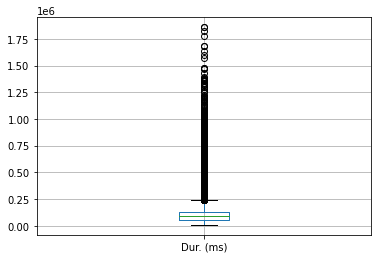

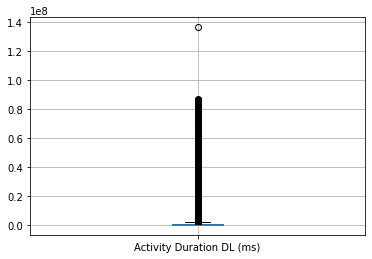

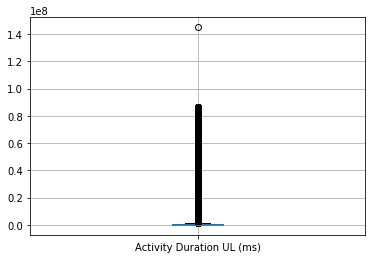

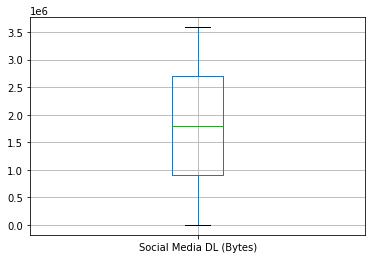

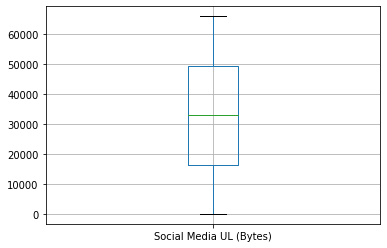

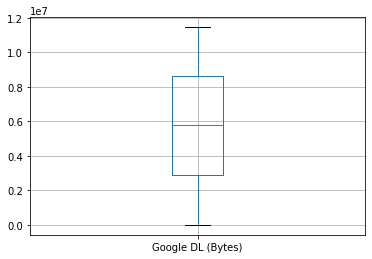

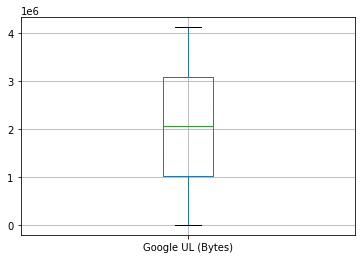

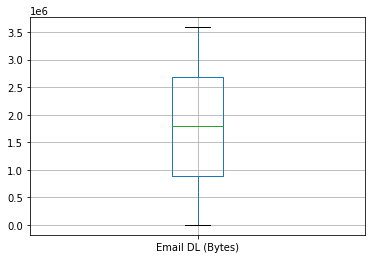

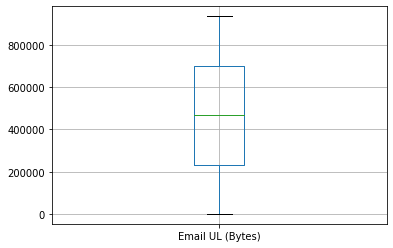

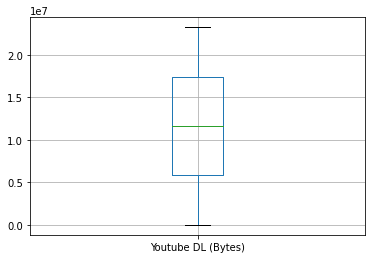

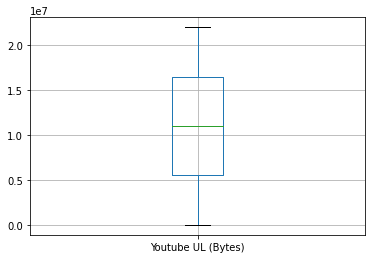

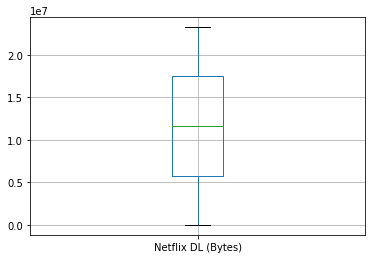

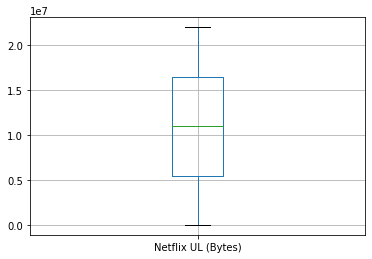

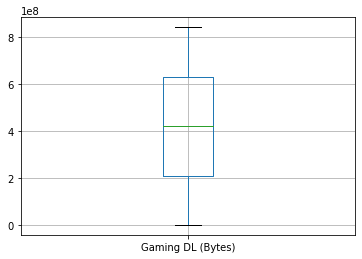

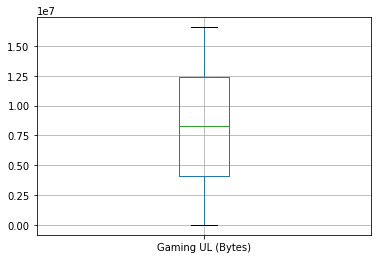

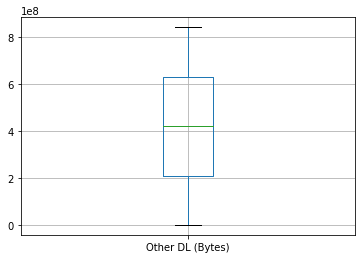

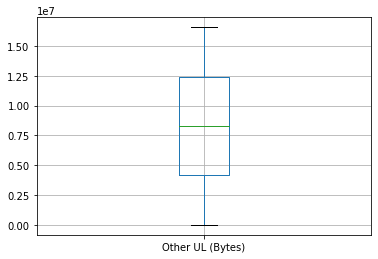

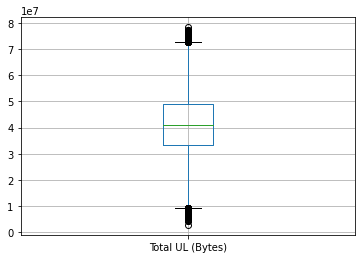

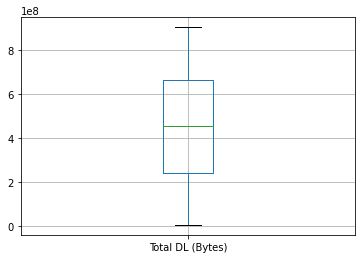

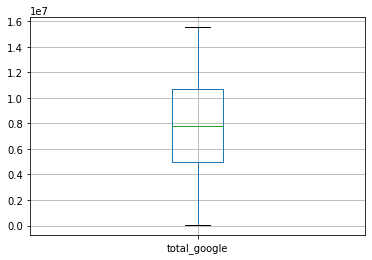

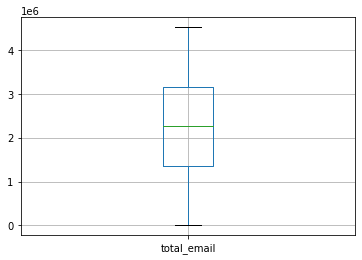

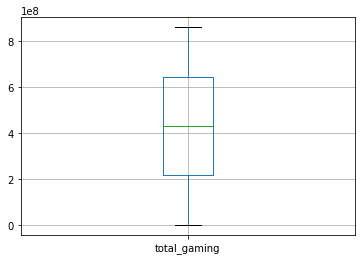

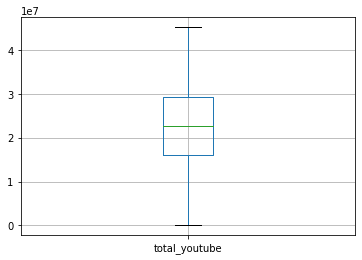

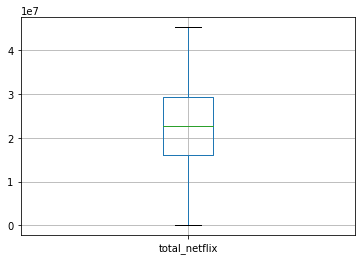

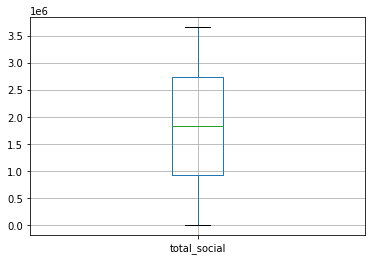

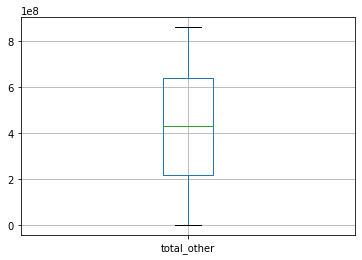

In [12]:
for features in relevant_features:
    plt.figure()
    df.boxplot([features])

* outlier observations

Duration in ms, activity duration ul, activity duration dl, and total ul data features have high degree of outliers and variance

To be filled with the median

In [13]:
df['fixed_dur'] = cleaner.fix_outlier(df, 'Dur. (ms)')
df['fixed_activity_dur_dl'] = cleaner.fix_outlier(df, 'Activity Duration DL (ms)')
df['fixed_activity_dur_ul'] = cleaner.fix_outlier(df, 'Activity Duration UL (ms)')
df['fixed_total_ul'] = cleaner.fix_outlier(df, 'Total UL (Bytes)')

column to be filled with median values: Dur. (ms)
column to be filled with median values: Activity Duration DL (ms)
column to be filled with median values: Activity Duration UL (ms)
column to be filled with median values: Total UL (Bytes)


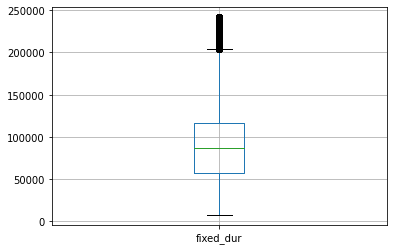

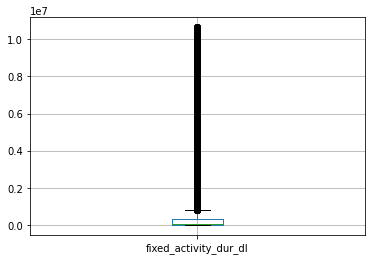

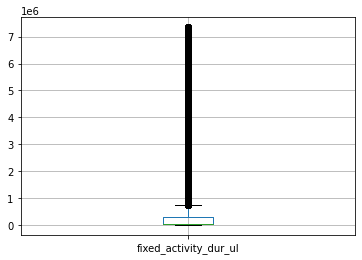

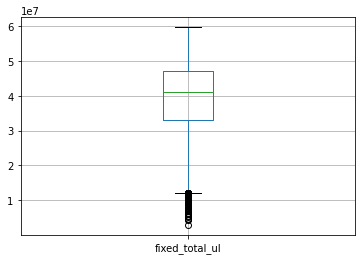

In [14]:
fixed_outliers = ['fixed_dur', 'fixed_activity_dur_dl', 'fixed_activity_dur_ul', 'fixed_total_ul']
for o_features in fixed_outliers:
    plt.figure()
    df.boxplot([o_features])

* Outliers fixed

#### Univariate Analysis

array([[<AxesSubplot:title={'center':'MSISDN/Number'}>,
        <AxesSubplot:title={'center':'Dur. (ms)'}>,
        <AxesSubplot:title={'center':'Total UL (Bytes)'}>],
       [<AxesSubplot:title={'center':'Total DL (Bytes)'}>,
        <AxesSubplot:title={'center':'total_google'}>,
        <AxesSubplot:title={'center':'total_email'}>],
       [<AxesSubplot:title={'center':'total_gaming'}>,
        <AxesSubplot:title={'center':'total_youtube'}>,
        <AxesSubplot:title={'center':'total_netflix'}>],
       [<AxesSubplot:title={'center':'total_social'}>,
        <AxesSubplot:title={'center':'total_other'}>, <AxesSubplot:>]],
      dtype=object)

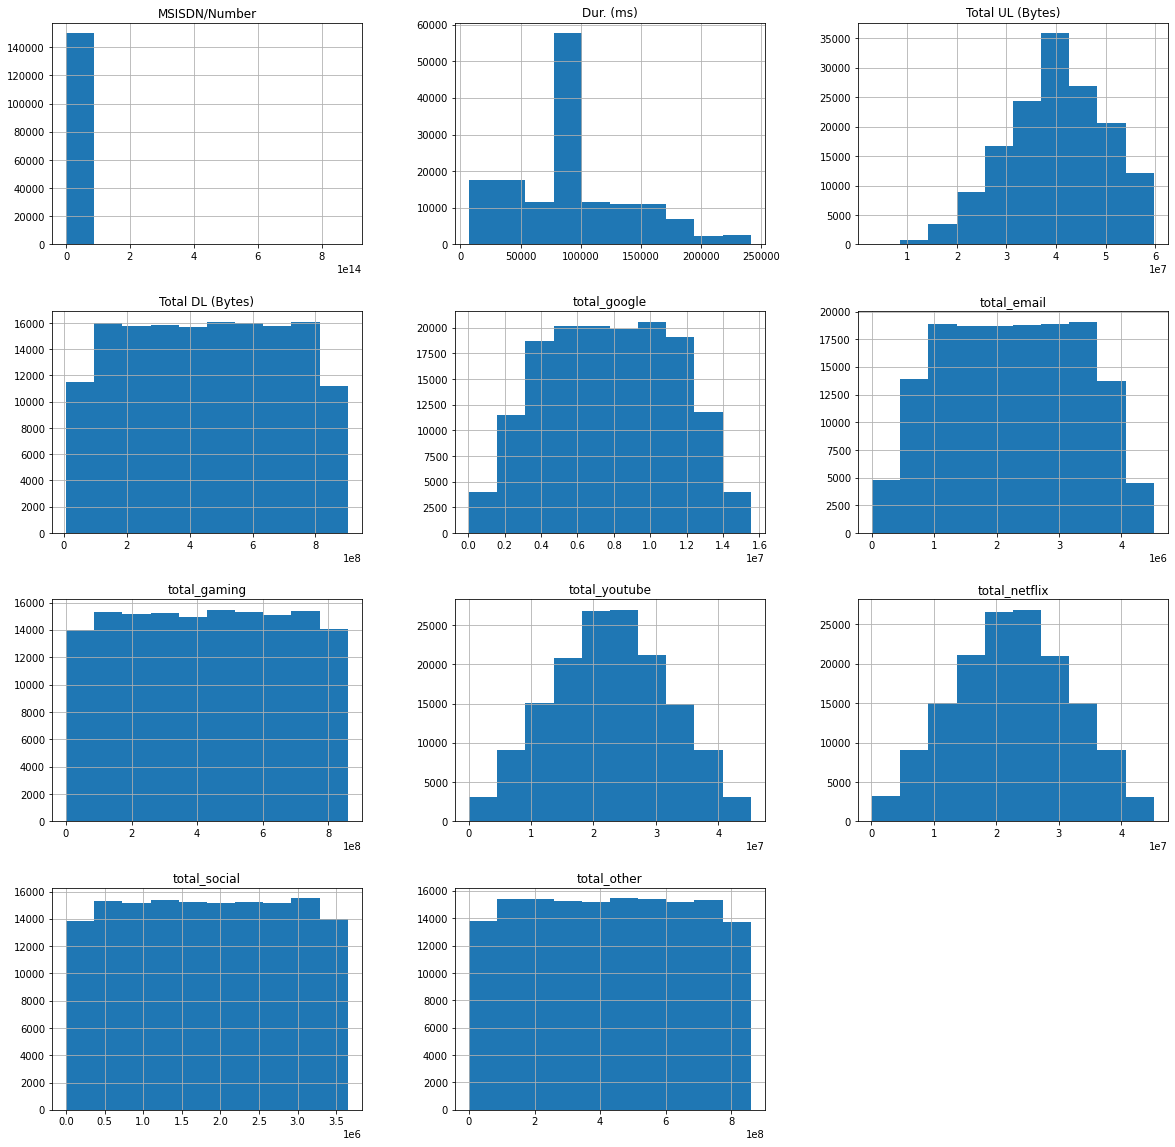

In [15]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df[sub_relevant_features].hist(ax = ax)

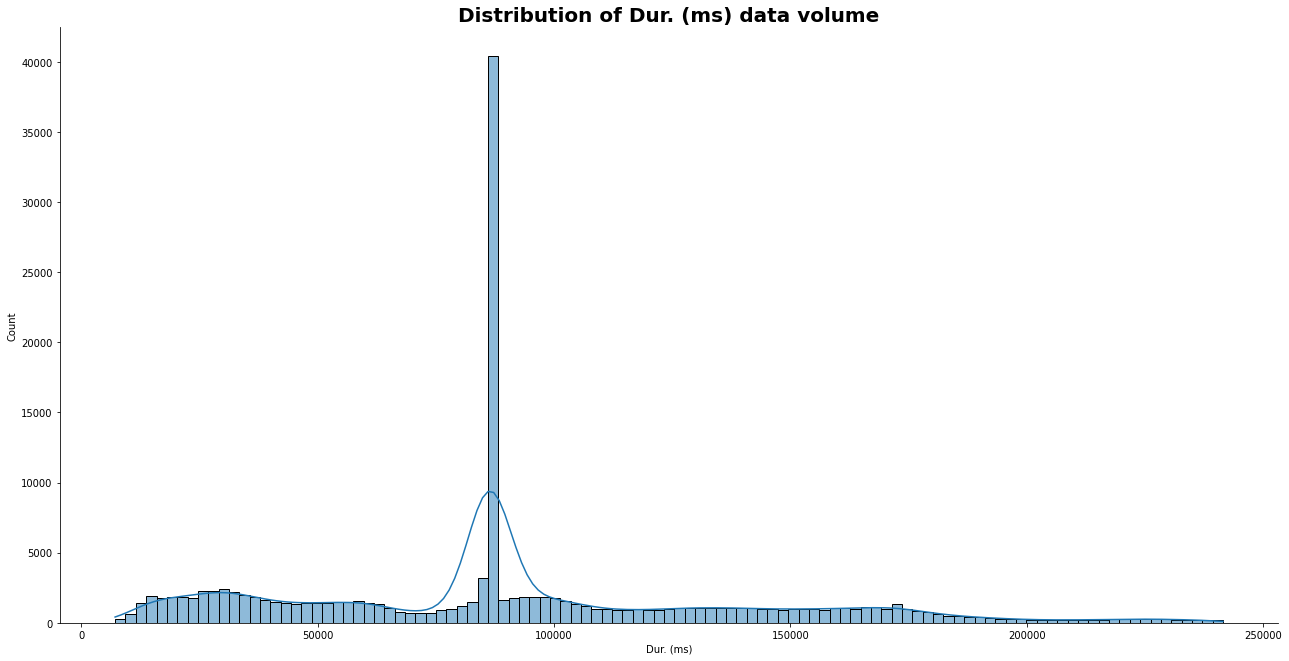

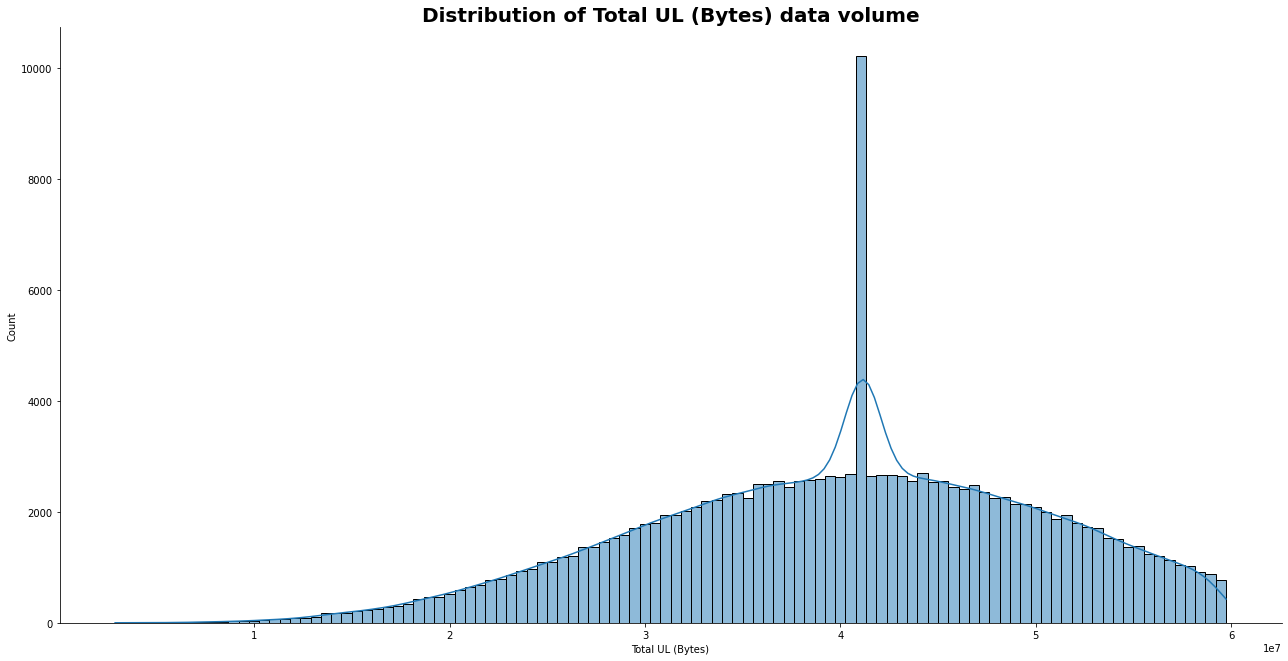

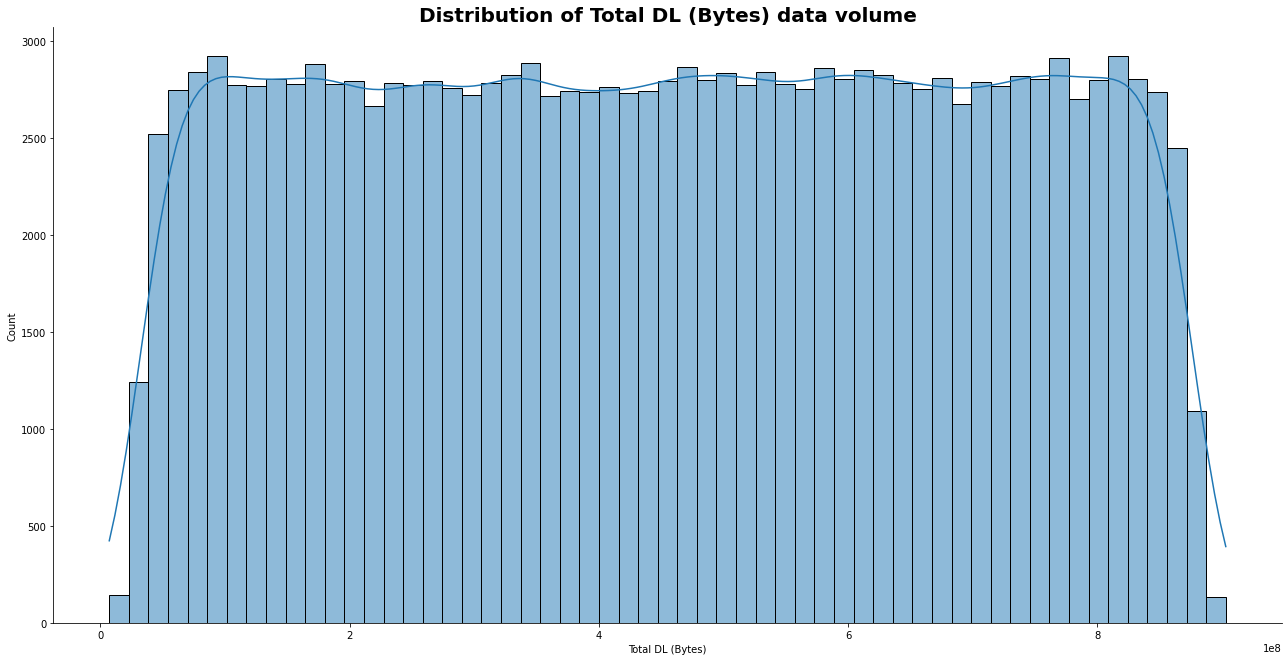

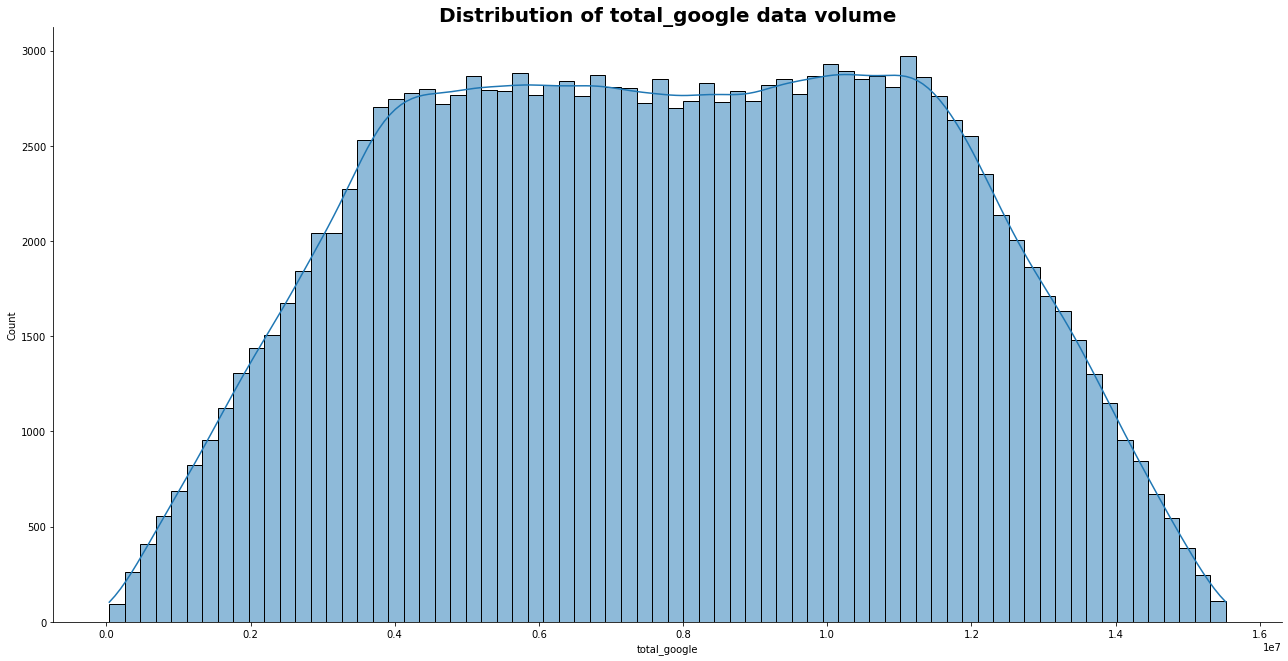

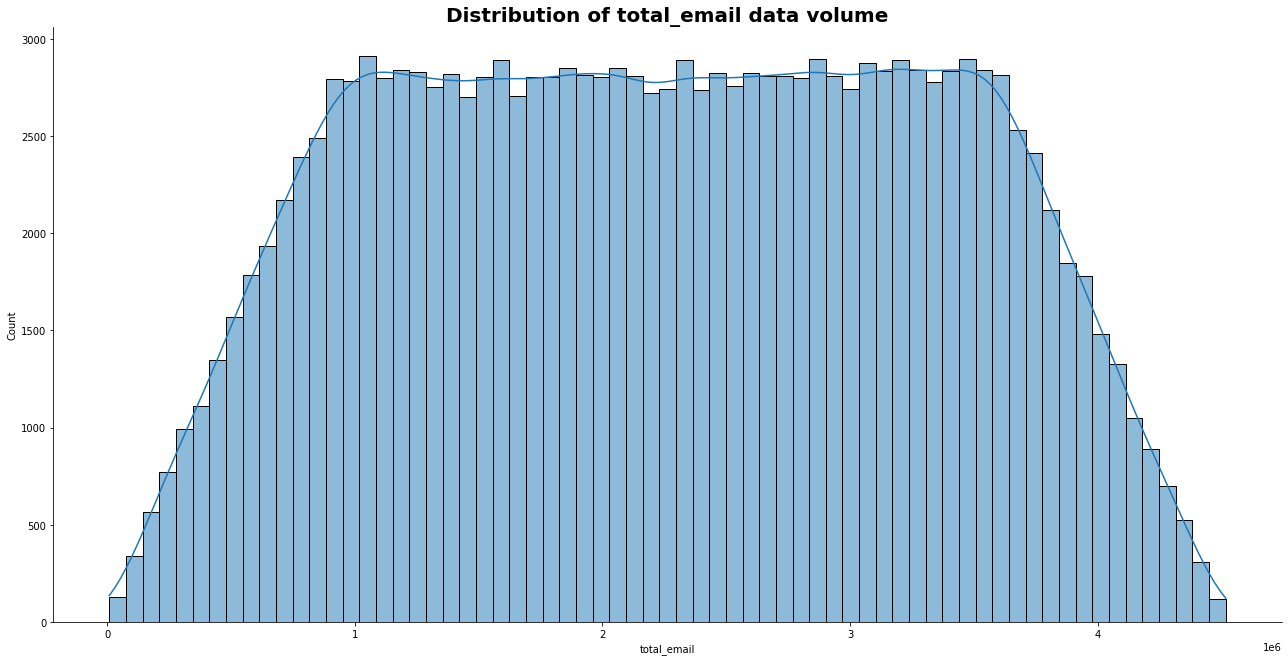

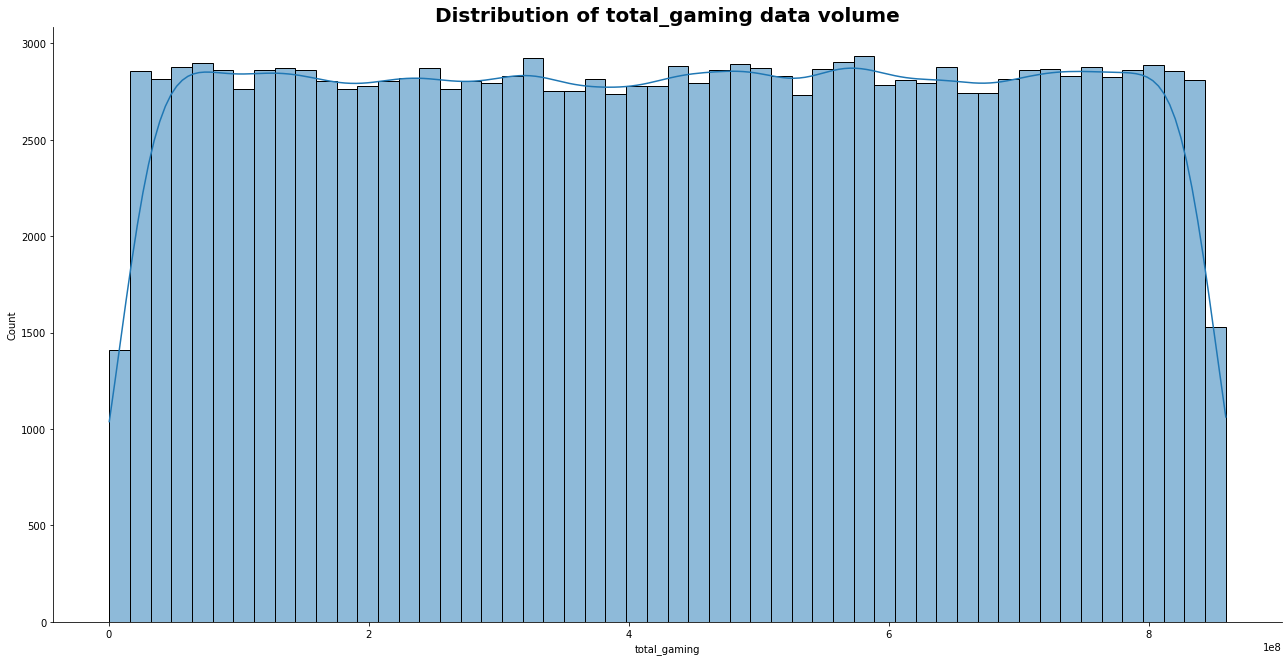

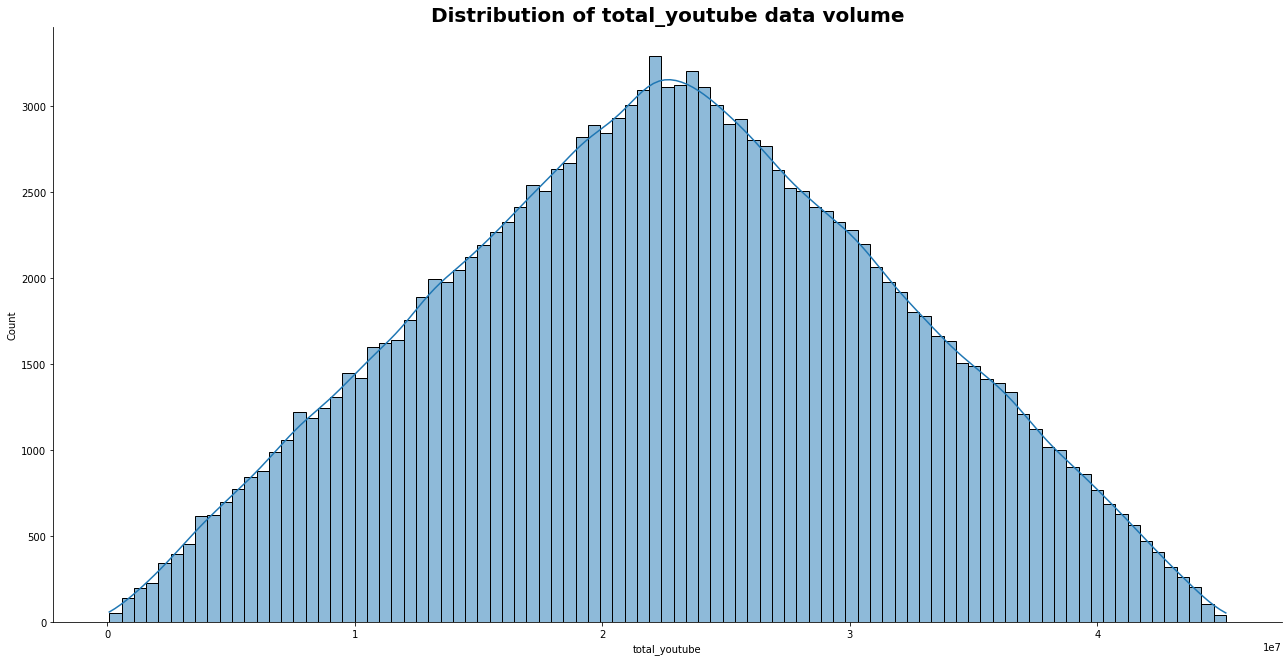

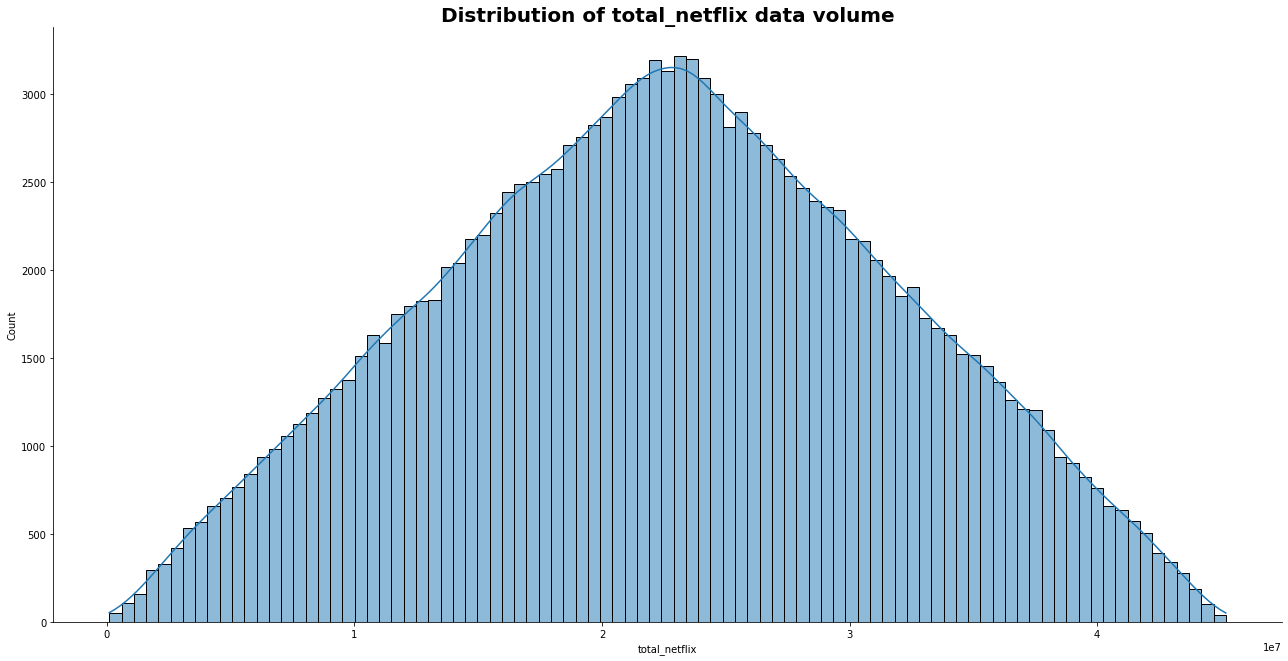

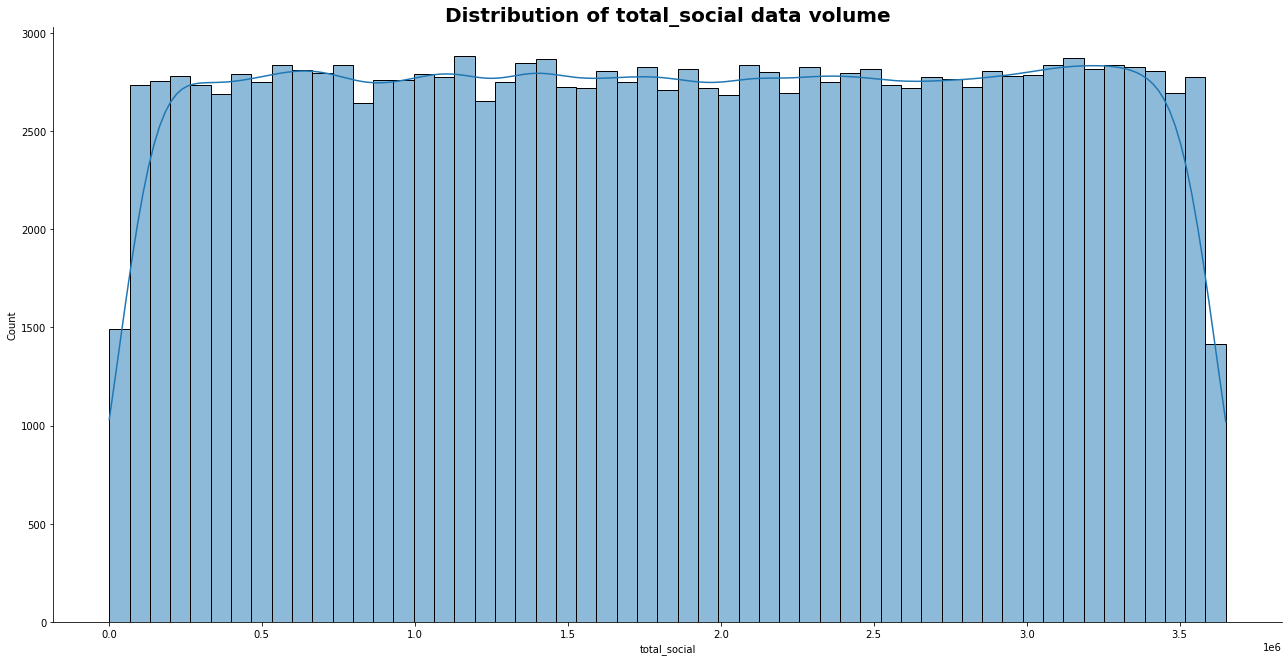

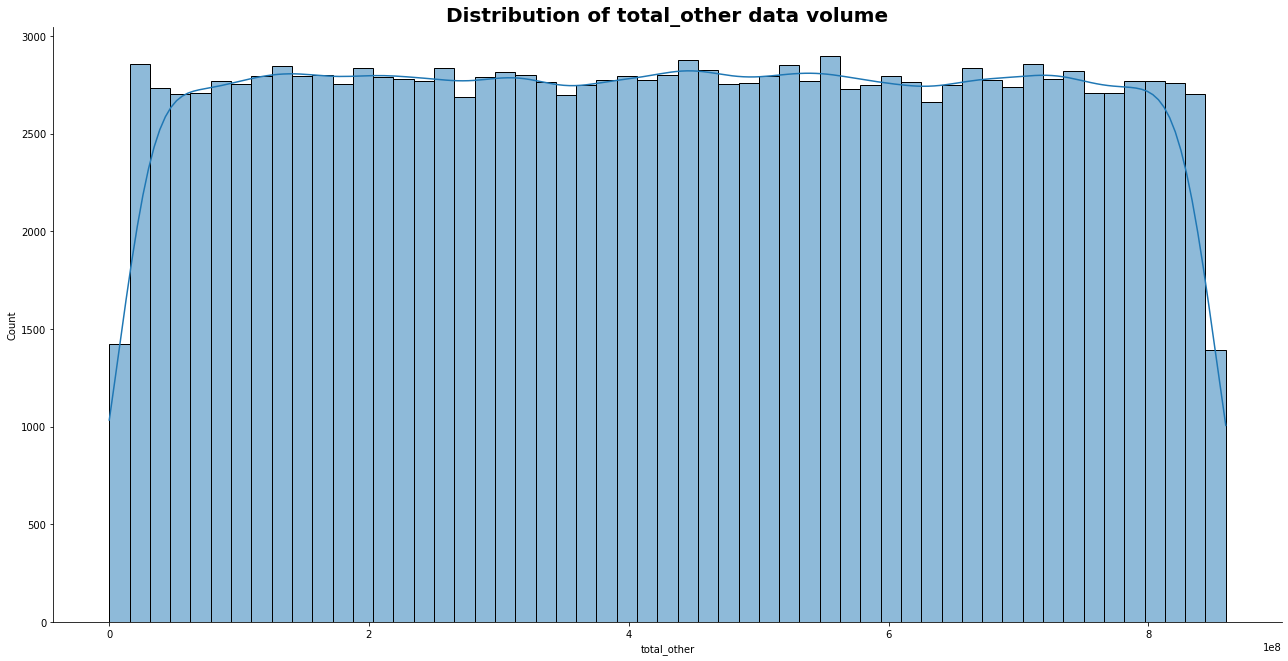

In [16]:
sns.displot(data = df, x = sub_relevant_features[1], kde=True, height=9, aspect=2)
plt.title(f'Distribution of {sub_relevant_features[1]} data volume', size=20, fontweight='bold')
plt.show()

sns.displot(data = df, x = sub_relevant_features[2], kde=True, height=9, aspect=2)
plt.title(f'Distribution of {sub_relevant_features[2]} data volume', size=20, fontweight='bold')
plt.show()

sns.displot(data = df, x = sub_relevant_features[3], kde=True, height=9, aspect=2)
plt.title(f'Distribution of {sub_relevant_features[3]} data volume', size=20, fontweight='bold')
plt.show()

sns.displot(data = df, x = sub_relevant_features[4], kde=True, height=9, aspect=2)
plt.title(f'Distribution of {sub_relevant_features[4]} data volume', size=20, fontweight='bold')
plt.show()

sns.displot(data = df, x = sub_relevant_features[5], kde=True, height=9, aspect=2)
plt.title(f'Distribution of {sub_relevant_features[5]} data volume', size=20, fontweight='bold')
plt.show()

sns.displot(data = df, x = sub_relevant_features[6], kde=True, height=9, aspect=2)
plt.title(f'Distribution of {sub_relevant_features[6]} data volume', size=20, fontweight='bold')
plt.show()

sns.displot(data = df, x = sub_relevant_features[7], kde=True, height=9, aspect=2)
plt.title(f'Distribution of {sub_relevant_features[7]} data volume', size=20, fontweight='bold')
plt.show()

sns.displot(data = df, x = sub_relevant_features[8], kde=True, height=9, aspect=2)
plt.title(f'Distribution of {sub_relevant_features[8]} data volume', size=20, fontweight='bold')
plt.show()

sns.displot(data = df, x = sub_relevant_features[9], kde=True, height=9, aspect=2)
plt.title(f'Distribution of {sub_relevant_features[9]} data volume', size=20, fontweight='bold')
plt.show()

sns.displot(data = df, x = sub_relevant_features[10], kde=True, height=9, aspect=2)
plt.title(f'Distribution of {sub_relevant_features[10]} data volume', size=20, fontweight='bold')
plt.show()

#### Categorical values

In [17]:
def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20, fontweight='bold')
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

In [18]:
categorical_features = ['Last Location Name', 'Handset Manufacturer', 'Handset Type']

ser1 = df.sample(frac=0.3, random_state=777)[categorical_features[1]].value_counts().nlargest(10)
ser2 = df.sample(frac=0.3, random_state=777)[categorical_features[2]].value_counts().nlargest(10)

name1 = ser1.keys()
count1 = ser1.values
name2 = ser2.keys()
count2 = ser2.values


df1 = pd.DataFrame({'Handset Manufacturer': name1, 'count': count1})
df2 = pd.DataFrame({'Handset Type': name2, 'count': count2})
print(df1, '\n\n', df2)

                   Handset Manufacturer  count
0                                 Apple  20880
1                               Samsung  12115
2                                Huawei  10337
3         Sony Mobile Communications Ab    295
4                      Wiko Global Sasu    226
5          Xiaomi Communications Co Ltd    118
6  Oneplus Technology (Shenzhen) Co Ltd     90
7                               Asustek     81
8                                Lenovo     78
9                             Crosscall     66 

                    Handset Type  count
0              Huawei B528S-23A   8818
1       Apple iPhone 6S (A1688)   2791
2        Apple iPhone 6 (A1586)   2710
3        Apple iPhone 7 (A1778)   1878
4       Apple iPhone Se (A1723)   1592
5        Apple iPhone 8 (A1905)   1508
6       Apple iPhone Xr (A2105)   1417
7  Samsung Galaxy S8 (Sm-G950F)   1387
8        Apple iPhone X (A1901)   1184
9   Samsung Galaxy J5 (Sm-J530)   1107


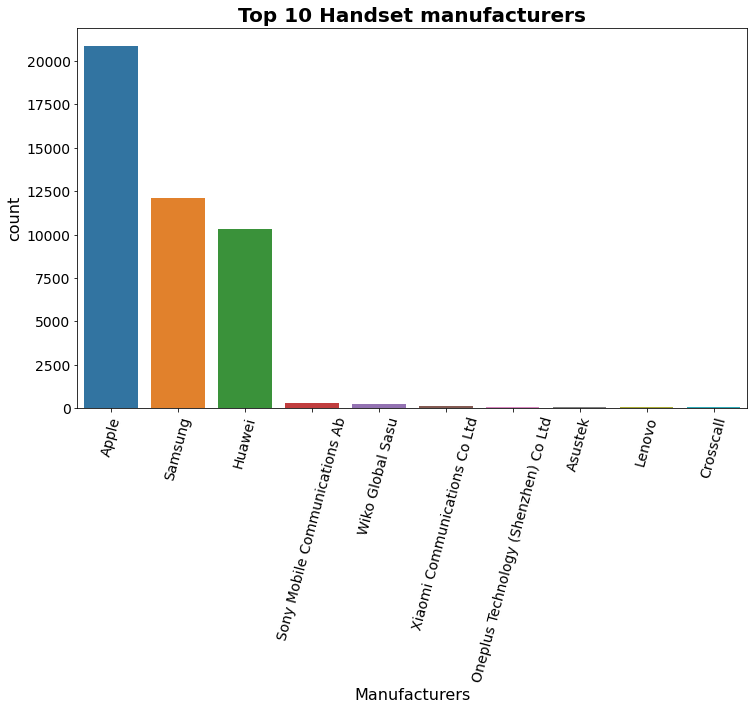

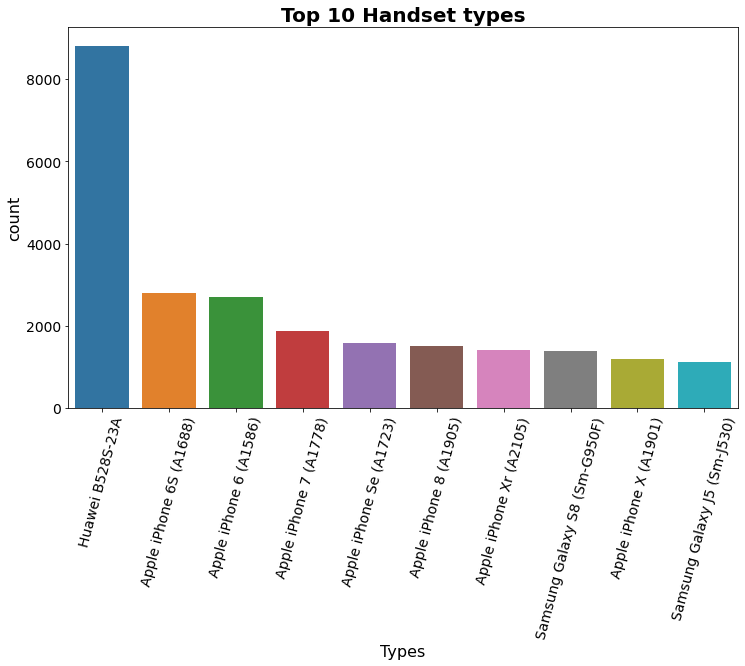

In [19]:
plot_bar(df= df1, x_col='Handset Manufacturer', y_col='count', title = 'Top 10 Handset manufacturers', xlabel= 'Manufacturers', ylabel='count')
plot_bar(df= df2, x_col='Handset Type', y_col='count', title = 'Top 10 Handset types', xlabel= 'Types', ylabel='count')

* very few of the handset manufacturers and very few of handset types dominate

### Bi-variate Analysis

In [20]:
# since the data is very large we took 10% to demonstrate
sample_data = df.sample(frac=0.1)
print(sample_data.shape)
sum_column = sample_data["Total DL (Bytes)"] + sample_data["Total UL (Bytes)"]

(15000, 66)


In [21]:
def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
#def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    #sns.scatterplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

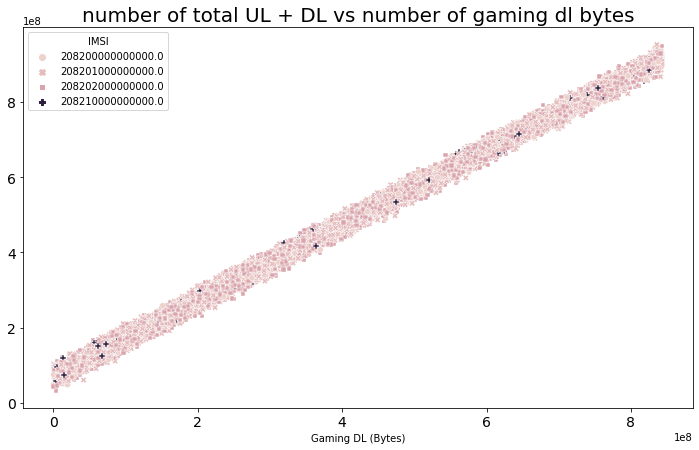

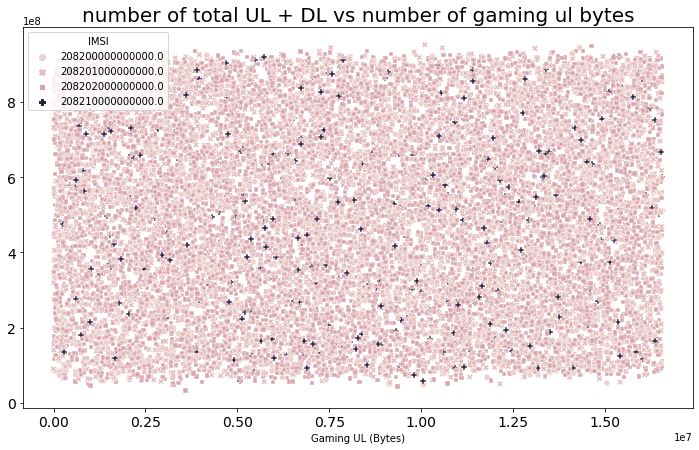

In [22]:
plot_scatter(sample_data, x_col='Gaming DL (Bytes)', y_col=sum_column, hue="IMSI",
             style="IMSI", title="number of total UL + DL vs number of gaming dl bytes")

plot_scatter(sample_data, x_col='Gaming UL (Bytes)', y_col=sum_column, hue="IMSI",
             style="IMSI", title="number of total UL + DL vs number of gaming ul bytes")

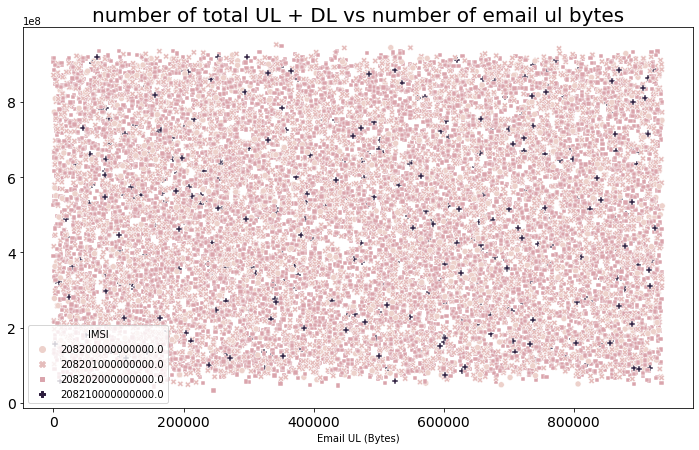

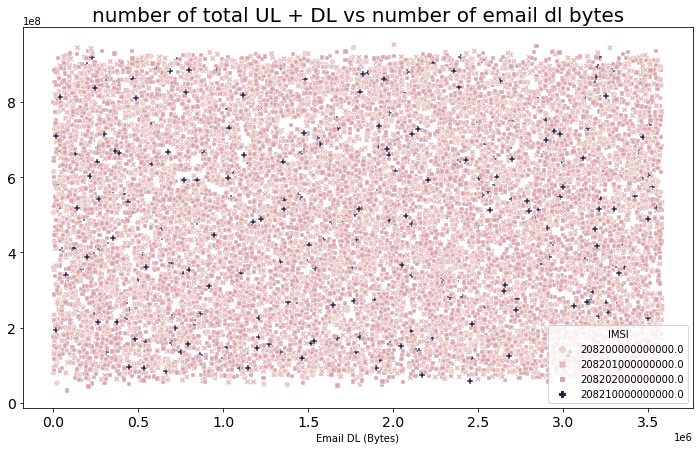

In [23]:
plot_scatter(sample_data, x_col='Email UL (Bytes)', y_col=sum_column, hue="IMSI",
             style="IMSI", title="number of total UL + DL vs number of email ul bytes")

plot_scatter(sample_data, x_col='Email DL (Bytes)', y_col=sum_column, hue="IMSI",
             style="IMSI", title="number of total UL + DL vs number of email dl bytes")

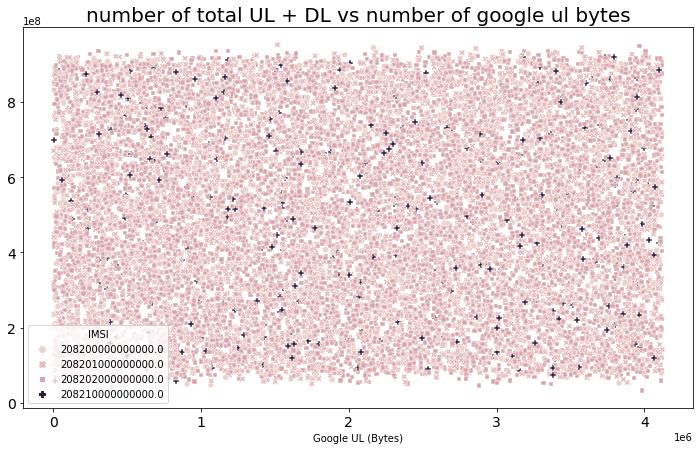

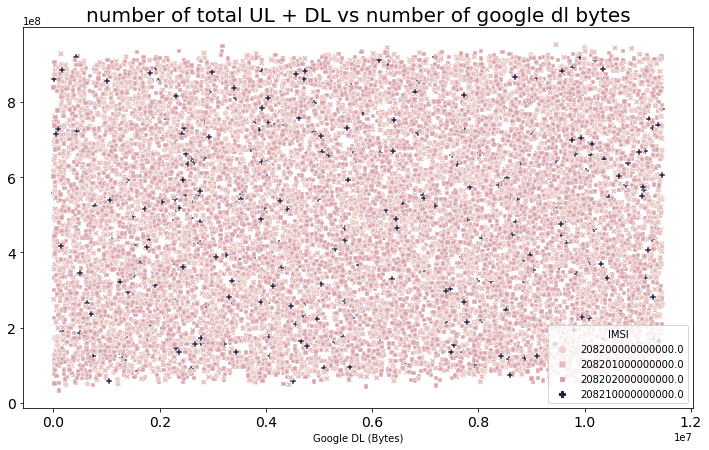

In [24]:
plot_scatter(sample_data, x_col='Google UL (Bytes)', y_col=sum_column, hue="IMSI",
             style="IMSI", title="number of total UL + DL vs number of google ul bytes")

plot_scatter(sample_data, x_col='Google DL (Bytes)', y_col=sum_column, hue="IMSI",
             style="IMSI", title="number of total UL + DL vs number of google dl bytes")

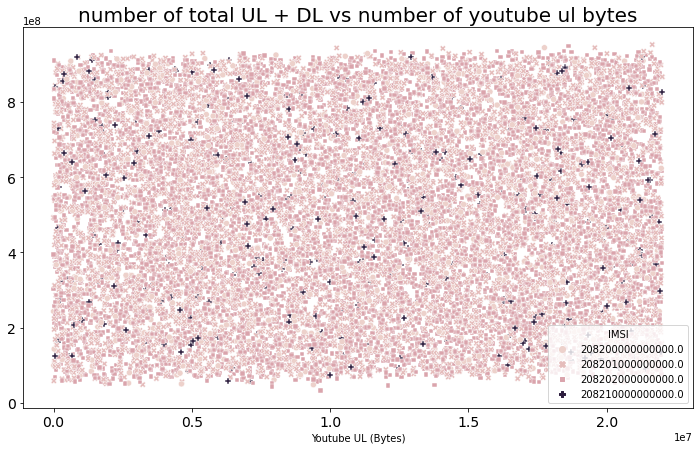

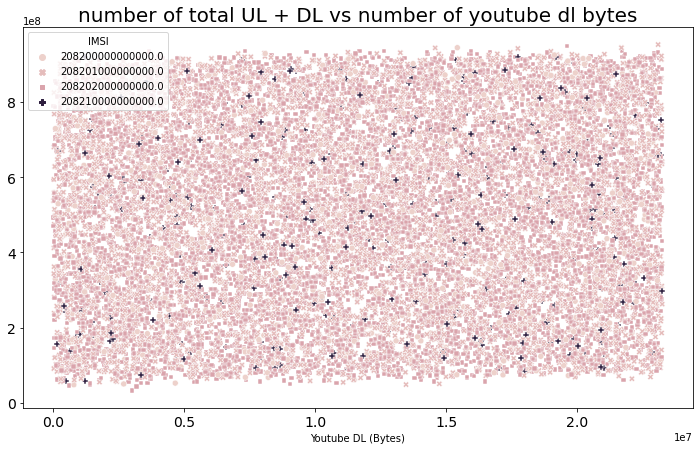

In [25]:
plot_scatter(sample_data, x_col='Youtube UL (Bytes)', y_col=sum_column, hue="IMSI",
             style="IMSI", title="number of total UL + DL vs number of youtube ul bytes")

plot_scatter(sample_data, x_col='Youtube DL (Bytes)', y_col=sum_column, hue="IMSI",
             style="IMSI", title="number of total UL + DL vs number of youtube dl bytes")

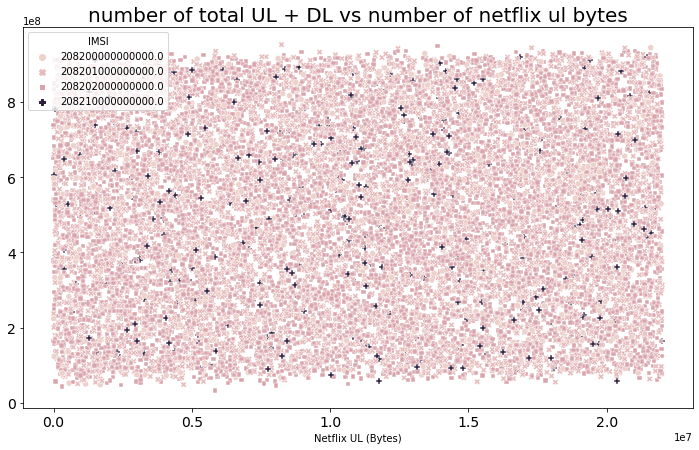

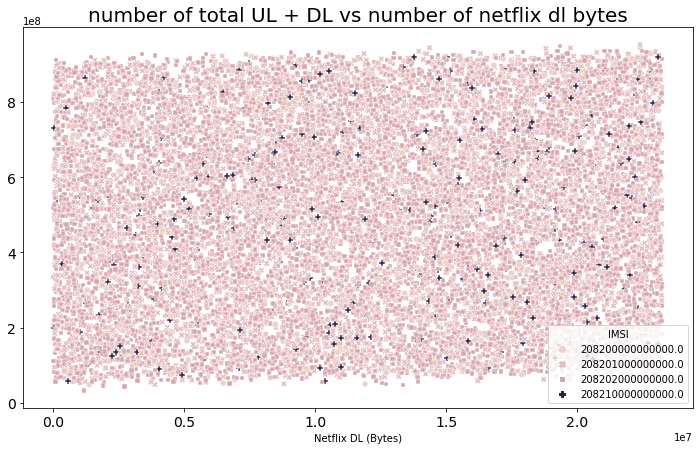

In [26]:
plot_scatter(sample_data, x_col='Netflix UL (Bytes)', y_col=sum_column, hue="IMSI",
             style="IMSI", title="number of total UL + DL vs number of netflix ul bytes")

plot_scatter(sample_data, x_col='Netflix DL (Bytes)', y_col=sum_column, hue="IMSI",
             style="IMSI", title="number of total UL + DL vs number of netflix dl bytes")

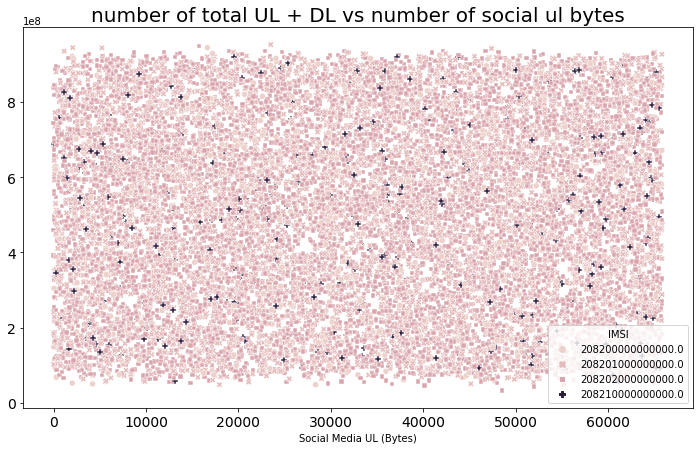

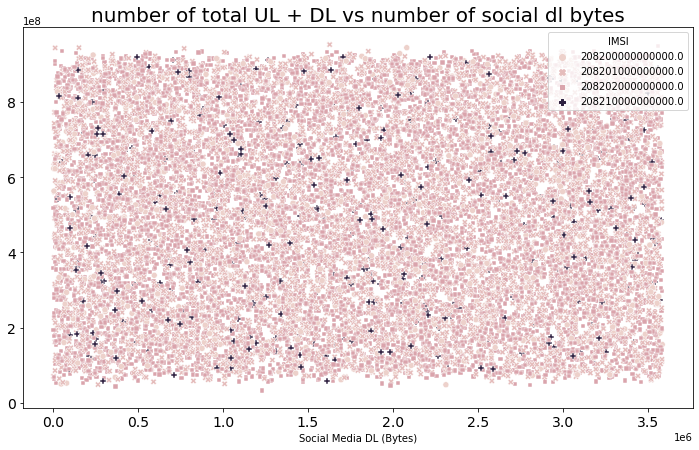

In [27]:
plot_scatter(sample_data, x_col='Social Media UL (Bytes)', y_col=sum_column, hue="IMSI",
             style="IMSI", title="number of total UL + DL vs number of social ul bytes")

plot_scatter(sample_data, x_col='Social Media DL (Bytes)', y_col=sum_column, hue="IMSI",
             style="IMSI", title="number of total UL + DL vs number of social dl bytes")

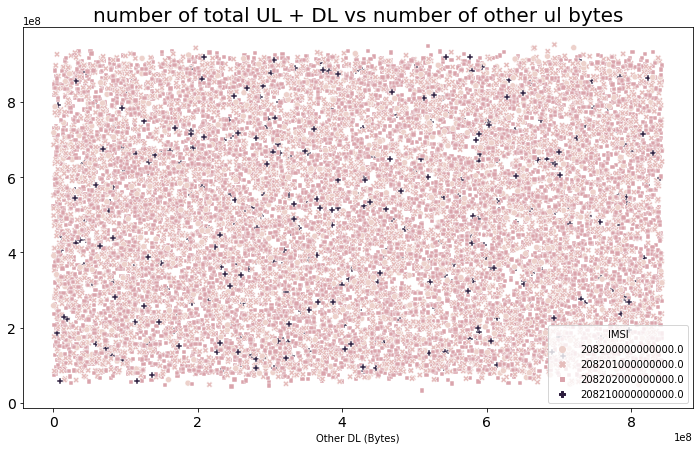

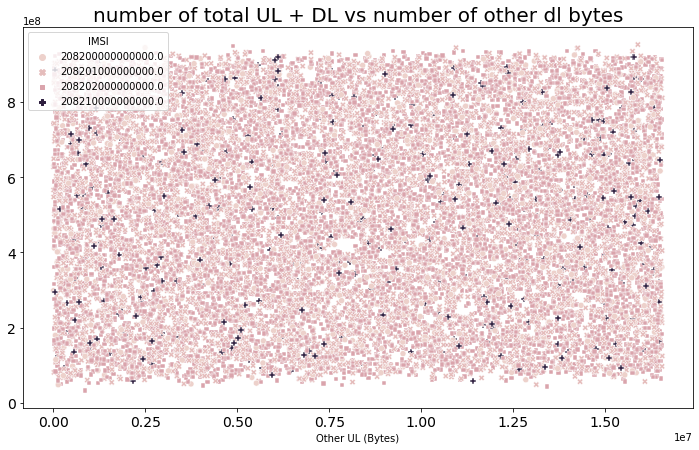

In [28]:
plot_scatter(sample_data, x_col='Other DL (Bytes)', y_col=sum_column, hue="IMSI",
             style="IMSI", title="number of total UL + DL vs number of other ul bytes")

plot_scatter(sample_data, x_col='Other UL (Bytes)', y_col=sum_column, hue="IMSI",
             style="IMSI", title="number of total UL + DL vs number of other dl bytes")

* There seems to be no real relation ship between the features with bi variate data analysis.

* Except for gaming which we found a postie relation with the overall data volume used

### Variable transformations

* segmenting the users into top 5 decile classes

Text(0, 0.5, 'Data Durations')

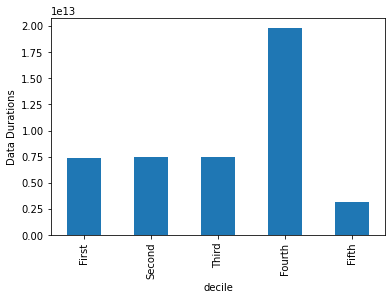

In [29]:
# compute the total dl and ul
df['total_data'] = df["Total DL (Bytes)"] + df["Total UL (Bytes)"]

# compute the decile classes
df['decile'] = pd.qcut(df['Dur. (ms)'],10, duplicates='drop')

ax=df.groupby('decile')['total_data'].sum().head(5).plot(kind='bar', xticks=[0,1,2,3,4])
ax.set_xticklabels(['First','Second','Third','Fourth','Fifth'])
ax.set_ylabel('Data Durations')

### Correlation Analysis

<AxesSubplot:>

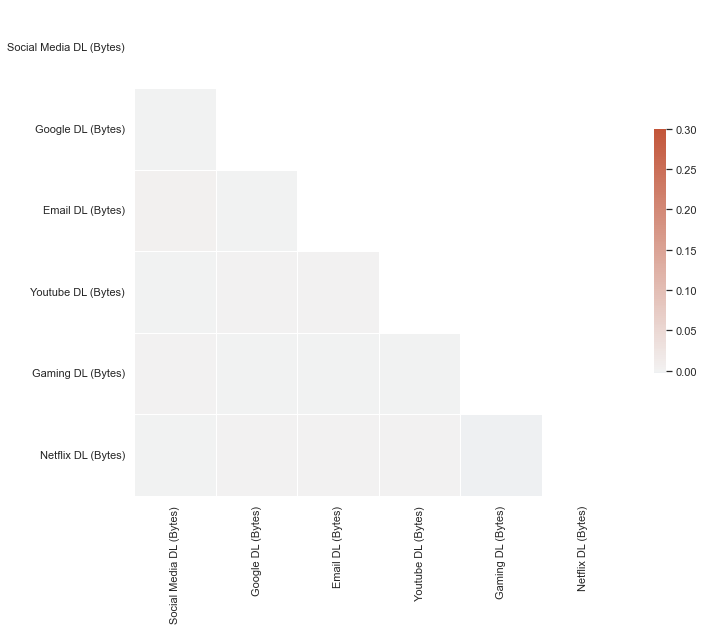

In [30]:
dlCorelation =  df[['Social Media DL (Bytes)','Google DL (Bytes)','Email DL (Bytes)','Youtube DL (Bytes)','Gaming DL (Bytes)','Netflix DL (Bytes)']].corr()

sns.set_theme(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(dlCorelation, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(dlCorelation, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [31]:
dlCorelation.style.background_gradient(cmap = cmap)

Few insights from correlation table on download data

I) There is a positive correlation between social media and email which is 0.0047, far higher than relation to others.

II) There is negative correlation between google and social media which is -0.0019.

III) There is negative correlation between gaming and youtube which is -0.0018.

IV) There is also almost no significant correlation between the download data volumes of the applications.

<AxesSubplot:>

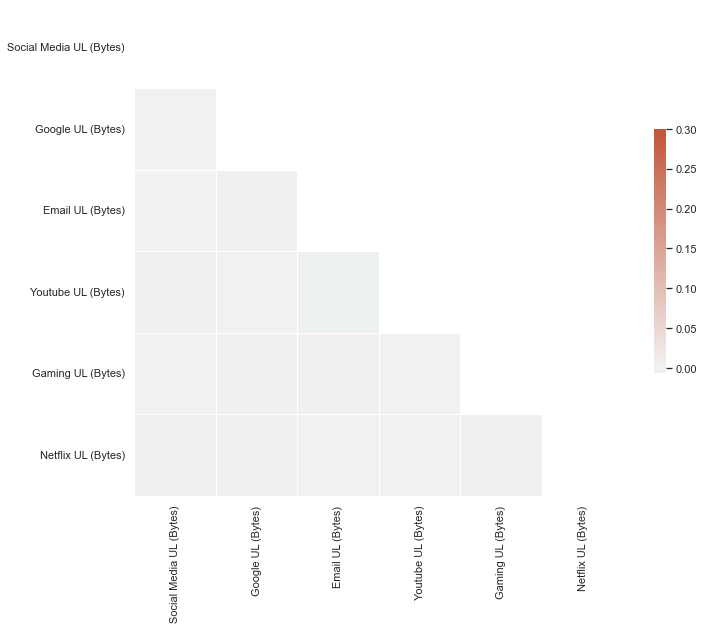

In [32]:
ulCorelation =  df[['Social Media UL (Bytes)','Google UL (Bytes)','Email UL (Bytes)','Youtube UL (Bytes)','Gaming UL (Bytes)','Netflix UL (Bytes)']].corr()

sns.set_theme(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(ulCorelation, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(ulCorelation, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [33]:
ulCorelation.style.background_gradient(cmap = cmap)

Few insights from correlation table on upload data

I) There is a positive correlation between gaming and email which is 0.005, far higher than relation to others.

II) There is negative correlation between youtube and email which is -0.0068.

III) There is negative correlation between google and netflix which is -0.004.

IV) There is also almost no significant correlation between the upload data volumes of the applications.

In [34]:
df

Bearer Id                Start  Start ms                  End  \
0       1.311450e+19  2019-04-04 12:01:00     770.0  2019-04-25 14:35:00   
1       1.311450e+19  2019-04-09 13:04:00     235.0  2019-04-25 08:15:00   
2       1.311450e+19  2019-04-09 17:42:00       1.0  2019-04-25 11:58:00   
3       1.311450e+19  2019-04-10 00:31:00     486.0  2019-04-25 07:36:00   
4       1.311450e+19  2019-04-12 20:10:00     565.0  2019-04-25 10:40:00   
...              ...                  ...       ...                  ...   
149995  1.304240e+19  2019-04-29 07:28:00     615.0  2019-04-30 00:01:00   
149996  7.277830e+18  2019-04-29 07:28:00     451.0  2019-04-30 06:02:00   
149997  7.349880e+18  2019-04-29 07:28:00     483.0  2019-04-30 10:41:00   
149998  1.311450e+19  2019-04-29 07:28:00     283.0  2019-04-30 10:46:00   
149999  1.311450e+19  2019-04-29 07:28:00     696.0  2019-04-30 10:40:00   

        End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0        662.0    86399.0  2.082010e+14   3.366496e+10  3.552120e+13   
1        606.0    86399.0  2.082020e+14   3.368185e+10  3.579400e+13   
2        652.0    86399.0  2.082000e+14   3.376063e+10  3.528150e+13   
3        171.0    86399.0  2.082010e+14   3.375034e+10  3.535660e+13   
4        954.0    86399.0  2.082010e+14   3.369980e+10  3.540700e+13   
...        ...        ...           ...            ...           ...   
149995   407.0    59587.0  2.082010e+14   3.366865e+10  3.533250e+13   
149996   214.0    81230.0  2.082020e+14   3.365069e+10  3.548310e+13   
149997   187.0    97970.0  2.082020e+14   3.366345e+10  3.566050e+13   
149998   810.0    98249.0  2.082020e+14   3.362189e+10  3.572120e+13   
149999   327.0    97910.0  2.082020e+14   3.361962e+10  8.618620e+13   

       Last Location Name  ...  total_youtube  total_netflix  total_social  \
0             9.16457E+15  ...     18355943.0     17855187.0     1570185.0   
1                 L77566A  ...     39359124.0     35565545.0     1933278.0   
2                 D42335A  ...     34425237.0     23751202.0     1726277.0   
3                 T21824A  ...     36534765.0     15092588.0      657493.0   
4                 D88865A  ...     34222253.0     17539799.0      912788.0   
...                   ...  ...            ...            ...           ...   
149995            T85721A  ...     24553645.0     29618711.0      993175.0   
149996            D20434A  ...     27955095.0     37561864.0     3517065.0   
149997            D10223C  ...     22165518.0     40643294.0     2352181.0   
149998            T51102A  ...     24516413.0     15029702.0     1260239.0   
149999            L88342B  ...     17122508.0     16494842.0      823109.0   

        total_other  fixed_dur  fixed_activity_dur_dl  fixed_activity_dur_ul  \
0       180558843.0    86399.0                37624.0                38787.0   
1       541959383.0    86399.0                  168.0                 3560.0   
2       414908351.0    86399.0                    0.0                    0.0   
3       761837216.0    86399.0                 3330.0                37882.0   
4       564619822.0    86399.0                    0.0                    0.0   
...             ...        ...                    ...                    ...   
149995  336273648.0    59587.0              3380381.0              2355730.0   
149996   16751926.0    81230.0                42376.0                41915.0   
149997  714638145.0    97970.0                17264.0                16759.0   
149998  132415585.0    98249.0                25003.0                28640.0   
149999  816120043.0    97910.0                13405.0                34088.0   

        fixed_total_ul   total_data               decile  
0           36749741.0  345629377.0   (72290.0, 86399.0]  
1           53800391.0  707185356.0   (72290.0, 86399.0]  
2           27883638.0  307690973.0   (72290.0, 86399.0]  
3           43324218.0  889352748.0   (72290.0, 86399.0]  
4           38542814.0  607681403.0   (7

In [35]:
# save the data frame
df.to_csv('../data/Week1_challenge_data_source_filled.csv.bz2', index=False)
print('file saved successfully')

file saved successfully
